# 🎬 Desafio Lighthouse – Análise Cinematográfica e Previsão de Nota IMDB

## 📝 Introdução

Este projeto faz parte do **Desafio Lighthouse da Indicium**, focado na área de **Data Science**.  
O objetivo é analisar dados de filmes e fornecer insights para auxiliar na decisão de qual tipo de filme deve ser produzido a seguir, além de desenvolver um modelo preditivo para estimar a nota do IMDB. A seguir, estão descritas todas as etapas do projeto, com explicações detalhadas sobre cada fase da análise e modelagem.

---

## 🎯 Objetivos do Projeto

🔹 Explorar e entender a base de dados cinematográficos;  
🔹 Gerar insights sobre gêneros, faturamento, notas e sinopses;  
🔹 Responder perguntas específicas de negócios e análise de dados;  
🔹 Desenvolver um modelo preditivo para IMDB_Rating;  
🔹 Documentar o processo completo de forma clara e organizada;  

---

## Estrutura do Desafio:

### 1️⃣ Análise Exploratória de Dados (EDA):
- Exploração inicial das variáveis;
- Criação de gráficos e tabelas resumidas;  
- Identificação de padrões e hipóteses iniciais;  

### 2️⃣ Respostas a perguntas estratégicas:
- Qual filme recomendar para uma pessoa que você não conhece?  
- Quais fatores influenciam o faturamento esperado de um filme?  
- O que a coluna *Overview* revela sobre o gênero ou características do filme?  

### 3️⃣ Modelagem Preditiva:
- Variáveis e transformações utilizadas;
- Tipo de problema: **Regressão**;  
- Escolha do modelo e justificativa;  
- Métricas de avaliação;

### 4️⃣ Previsão para um filme específico:
- Filme: *The Shawshank Redemption*;  
- Previsão da nota IMDB com o modelo treinado;

### 5️⃣ Entregáveis finais:
- Modelo salvo em `.pkl`;  
- Notebook ou script Python com o passo a passo;  
- Relatórios de análise;  
- Arquivo `requirements.txt` com pacotes utilizados;
- README detalhado com instruções e documentação;  

---

## 📊 Dicionário de Dados:

| Coluna | Descrição |
|--------|-----------|
| Series_Title | Nome do filme |
| Released_Year | Ano de lançamento |
| Certificate | Classificação etária |
| Runtime | Duração do filme |
| Genre | Gênero do filme |
| IMDB_Rating | Nota do IMDB |
| Overview | Sinopse/resumo do filme |
| Meta_score | Média ponderada de críticas |
| Director | Diretor |
| Star1 | Ator/Atriz principal |
| Star2 | Ator/Atriz secundário |
| Star3 | Ator/Atriz terciário |
| Star4 | Ator/Atriz coadjuvante |
| No_of_Votes | Número de votos no IMDB |
| Gross | Faturamento |




1️⃣ Etapa 1 – Análise Exploratória dos Dados (EDA)

O objetivo é conhecer melhor a estrutura da tabela, verificar o tamanho do conjunto de dados, observar os tipos de variáveis e identificar se existem valores ausentes. Essa etapa é importante porque nos ajuda a entender quais informações estão disponíveis e como elas poderão ser utilizadas nas análises e modelagens seguintes.

In [5]:
# Importando biblioteca:
import pandas as pd

# Link:
url = "https://docs.google.com/spreadsheets/d/1JB-RL9C8Xz6toUWTNhMpaWeLlYvva8qU/export?format=xlsx"

# Carregando os dados:
dados = pd.read_excel(url)

# Exibindo as 5 primeiras linhas:
print("Visualização inicial dos dados:")
print(dados.head())


Visualização inicial dos dados:
   Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging pa

Com essa visualização inicial já percebemos que existem colunas **numéricas**, **categóricas** e **textuais**, o que abre espaço para análises variadas:  
- Comparações entre gêneros e notas;  
- Relação entre votos e faturamento;  
- Possíveis insights extraídos da coluna *Overview*.  

Para entender melhor os dados, verifico os tipos de cada coluna e a presença de valores nulos. Isso permite identificar:

- Quais colunas são numéricas, categóricas ou textuais;

- Se há necessidade de tratar valores faltantes antes de prosseguir com a análise.

In [6]:
# Verificando os tipos de colunas e valores nulos:
print("Tipos de colunas e quantidade de valores nulos em cada coluna:")
print(dados.info())

# Contando quantos valores nulos existem em cada coluna:
print("\nNúmero de valores nulos por coluna:")
print(dados.isnull().sum())


Tipos de colunas e quantidade de valores nulos em cada coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)

Observa-se que:

- Existem 16 colunas, das quais a maioria é do tipo textual (object), algumas são numéricas (int64 e float64);

- Algumas colunas apresentam valores nulos, sendo Certificate (101 nulos), Meta_score (157 nulos) e Gross (169 nulos);

- Colunas como IMDB_Rating, No_of_Votes e Meta_score são importantes para análises quantitativas, enquanto Genre, Director e Star1-4 permitem análises categóricas;

Para entender melhor os dados numéricos, verifico a distribuição básica de cada coluna numérica, como média, mediana, mínimo, máximo e quartis. Isso me ajuda a identificar padrões gerais e possíveis valores atípicos.


In [7]:
# Estatísticas básicas das colunas numéricas
estatisticas_numericas = dados.describe()
print(estatisticas_numericas)


       Unnamed: 0  IMDB_Rating  Meta_score   No_of_Votes
count  999.000000   999.000000  842.000000  9.990000e+02
mean   500.000000     7.947948   77.969121  2.716214e+05
std    288.530761     0.272290   12.383257  3.209126e+05
min      1.000000     7.600000   28.000000  2.508800e+04
25%    250.500000     7.700000   70.000000  5.547150e+04
50%    500.000000     7.900000   79.000000  1.383560e+05
75%    749.500000     8.100000   87.000000  3.731675e+05
max    999.000000     9.200000  100.000000  2.303232e+06


Observo algumas informações importantes:

- A coluna Unnamed: 0 é apenas um índice e não carrega informação relevante para análise;
- As notas do IMDB_Rating variam entre 7.6 e 9.2, com média próxima de 7.95, indicando que a maior parte dos filmes tem avaliações altas;
- O Meta_score apresenta alguns valores faltantes (apenas 842 registros), e varia de 28 a 100, com média de aproximadamente 78;
- O número de votos (No_of_Votes) mostra grande variação, de cerca de 25 mil a mais de 2 milhões, indicando que alguns filmes são muito mais populares que outros.

Essas estatísticas iniciais ajudam a entender a distribuição geral e a identificar possíveis valores extremos.

Para visualizar melhor a distribuição das colunas numéricas, gero histogramas simples de cada uma delas. Isso auxilia a identificar padrões, tendências e possíveis valores extremos.


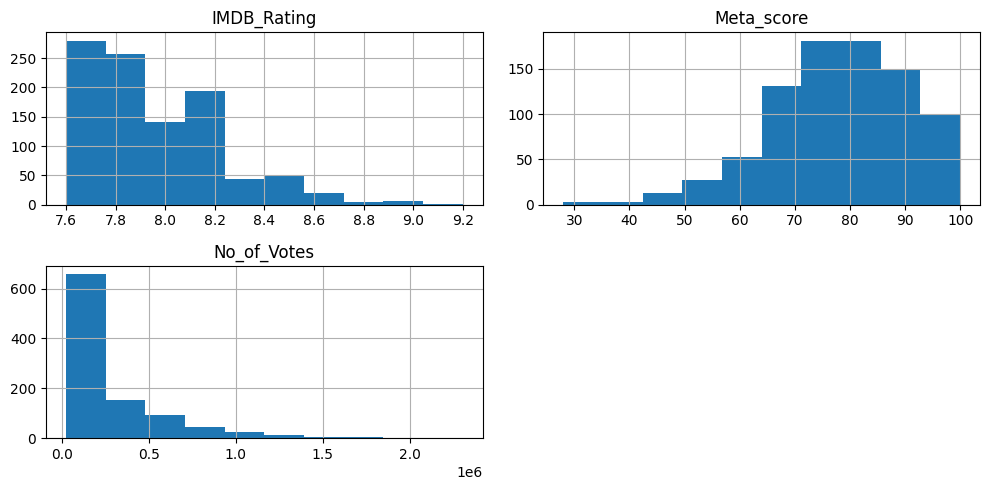

In [8]:
# Importando biblioteca de visualização:
import matplotlib.pyplot as plt

# Selecionando apenas as colunas numéricas relevantes:
colunas_numericas = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']

# Criando histogramas para cada coluna numérica:
dados[colunas_numericas].hist(bins=10, figsize=(10,5))
plt.tight_layout()
plt.show()



**Interpretação dos histogramas:**

•	**IMDB_Rating:** A distribuição de notas é estreita e concentrada entre aproximadamente 7.6 e 8.3, com poucos filmes acima de 8.5. Isso indica baixa variabilidade nas avaliações (desvio padrão pequeno), ou seja, a maioria dos títulos neste conjunto tem avaliações relativamente altas e próximas entre si. Para modelagem, isso significa que prever pequenas diferenças na nota pode ser mais difícil, pois a variável alvo tem pouca dispersão.

•	**Meta_score:** O meta score tem uma faixa maior (≈28 a 100) e parece concentrar-se em torno de valores entre 70 e 90. Há mais variabilidade em relação ao IMDB_Rating e alguns registros faltando. Como é uma medida de crítica especializada, tende a ser um bom preditor numérico da nota do IMDB, desde que tratemos os missing adequadamente.

•	**No_of_Votes:** Mostra forte assimetria à direita, “long tail”, muitos filmes com relativamente poucos votos e poucos filmes com dezenas/centenas de milhares. Essa assimetria justifica a transformação logarítmica antes de usar essa variável em análises ou modelos, para reduzir a influência dos outliers e facilitar a visualização.


Para avaliar a associação entre popularidade (número de votos) e qualidade percebida (IMDB_Rating), aplico uma transformação logarítmica em No_of_Votes e ploto a dispersão entre log_votes e IMDB_Rating. Faço também um plot entre Meta_score e IMDB_Rating. Por fim, calculo a correlação de Pearson entre IMDB_Rating e cada uma dessas variáveis para quantificar a força da associação.

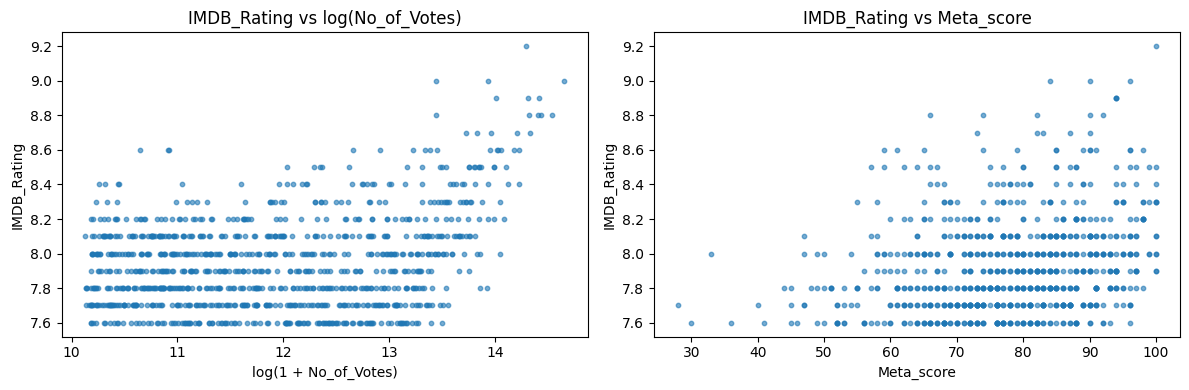

Correlação Pearson IMDB_Rating x log_votes: 0.318
Correlação Pearson IMDB_Rating x Meta_score: 0.271


In [9]:
#Importação das bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Criar coluna com log(1 + No_of_Votes):
dados['log_votes'] = np.log1p(dados['No_of_Votes'])

# Plots de dispersão lado a lado:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(dados['log_votes'], dados['IMDB_Rating'], s=10, alpha=0.6)
plt.xlabel('log(1 + No_of_Votes)')
plt.ylabel('IMDB_Rating')
plt.title('IMDB_Rating vs log(No_of_Votes)')

plt.subplot(1,2,2)
plt.scatter(dados['Meta_score'], dados['IMDB_Rating'], s=10, alpha=0.6)
plt.xlabel('Meta_score')
plt.ylabel('IMDB_Rating')
plt.title('IMDB_Rating vs Meta_score')

plt.tight_layout()
plt.show()

# Calcular correlações de Pearson (apenas pares com dados não-nulos):
corr_votes = dados[['IMDB_Rating', 'log_votes']].dropna().corr().loc['IMDB_Rating','log_votes']
corr_meta = dados[['IMDB_Rating', 'Meta_score']].dropna().corr().loc['IMDB_Rating','Meta_score']

print(f"Correlação Pearson IMDB_Rating x log_votes: {corr_votes:.3f}")
print(f"Correlação Pearson IMDB_Rating x Meta_score: {corr_meta:.3f}")


**Análise dos gráficos e correlações:**

Os gráficos de dispersão mostram uma tendência positiva moderada:

- Filmes com maior número de votos (mais populares) tendem a ter avaliações mais altas no IMDB.

- Da mesma forma, quanto maior o Meta_score, maior tende a ser o IMDB_Rating.

Os coeficientes de correlação de Pearson confirmam essa leitura:

- **IMDB_Rating × log_votes = 0.318**, associação positiva moderada entre popularidade e avaliação do público.

- **IMDB_Rating × Meta_score = 0.271**, associação positiva, porém um pouco mais fraca, entre avaliação da crítica e avaliação do público.

Em resumo, tanto a popularidade quanto a crítica parecem influenciar as notas do IMDB, mas nenhuma das duas explica sozinha a variação nas avaliações.


Para entender o papel das variáveis categóricas, avalio a distribuição da quantidade de filmes por gênero e por classificação indicativa (Certificate). Isso ajuda a identificar quais categorias são mais frequentes no conjunto de dados e fornece uma visão inicial da composição do dataset.

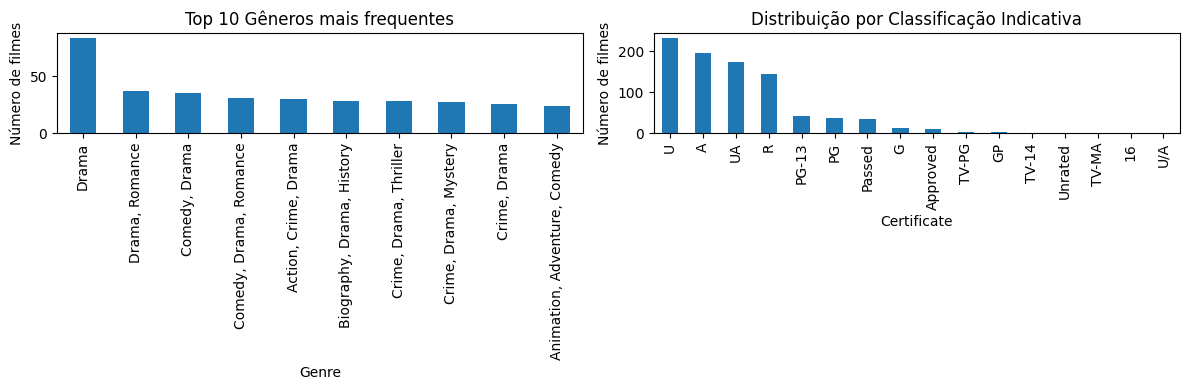

Top 10 gêneros:
Genre
Drama                           84
Drama, Romance                  37
Comedy, Drama                   35
Comedy, Drama, Romance          31
Action, Crime, Drama            30
Biography, Drama, History       28
Crime, Drama, Thriller          28
Crime, Drama, Mystery           27
Crime, Drama                    26
Animation, Adventure, Comedy    24
Name: count, dtype: int64

Distribuição por classificação indicativa:
Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64


In [10]:
# Contagem de filmes por Gênero e por Classificação Indicativa:
import matplotlib.pyplot as plt

# Contagem de cada categoria:
contagem_genero = dados['Genre'].value_counts().head(10)   # 10 gêneros mais comuns
contagem_certificado = dados['Certificate'].value_counts()

# Plots:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
contagem_genero.plot(kind='bar')
plt.title("Top 10 Gêneros mais frequentes")
plt.ylabel("Número de filmes")

plt.subplot(1,2,2)
contagem_certificado.plot(kind='bar')
plt.title("Distribuição por Classificação Indicativa")
plt.ylabel("Número de filmes")

plt.tight_layout()
plt.show()

# Mostrar tabelas:
print("Top 10 gêneros:")
print(contagem_genero)

print("\nDistribuição por classificação indicativa:")
print(contagem_certificado)


- **Gêneros (Genre):** O gênero Drama aparece como o mais frequente, com 84 filmes, seguido por combinações como Drama, Romance e Comedy, Drama. Isso mostra que a maior parte do dataset é composta por dramas puros ou misturados com romance, comédia e crime, indicando certa concentração temática.

- **Classificação indicativa (Certificate):** As classificações mais comuns são U (234 filmes), A (196 filmes), UA (175 filmes) e R (146 filmes), cobrindo a maior parte do acervo. As demais categorias aparecem com frequência bastante reduzida, o que pode dificultar análises mais robustas para elas.


Para investigar se determinados gêneros e classificações indicativas estão associados a melhores avaliações, calculo a média do IMDB_Rating por gênero e por classificação indicativa.

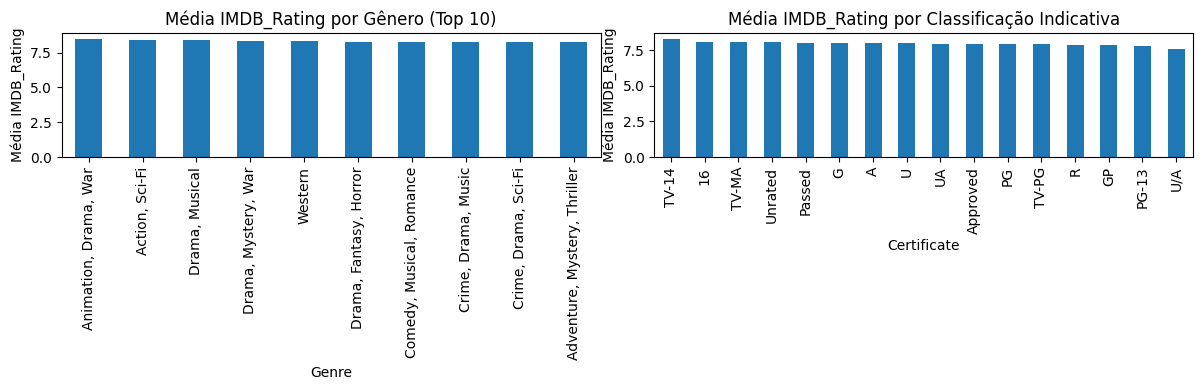

In [11]:
import matplotlib.pyplot as plt

# Média do IMDB_Rating por gênero (10 mais frequentes):
media_genero = dados.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

# Média do IMDB_Rating por classificação indicativa:
media_certificado = dados.groupby('Certificate')['IMDB_Rating'].mean().sort_values(ascending=False)

# Plots:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
media_genero.plot(kind='bar')
plt.title('Média IMDB_Rating por Gênero (Top 10)')
plt.ylabel('Média IMDB_Rating')

plt.subplot(1,2,2)
media_certificado.plot(kind='bar')
plt.title('Média IMDB_Rating por Classificação Indicativa')
plt.ylabel('Média IMDB_Rating')

plt.tight_layout()
plt.show()


O gráfico mostra que as médias de IMDB_Rating variam pouco entre os diferentes gêneros e classificações indicativas. Alguns gêneros específicos, como “Animation, Drama, War” e “Action, Sci-Fi”, apresentam médias ligeiramente mais altas, mas de modo geral os valores ficam bastante próximos. O mesmo ocorre para as classificações: não há uma diferença clara de avaliação entre faixas etárias distintas. Isso sugere que a percepção de qualidade (IMDB_Rating) é relativamente estável independentemente da classificação indicativa ou do gênero.

Para identificar valores atípicos, utilizo boxplots das principais variáveis numéricas (IMDB_Rating, Meta_score e log_votes). Essa visualização ajuda a detectar filmes que estão muito acima ou abaixo da distribuição central.

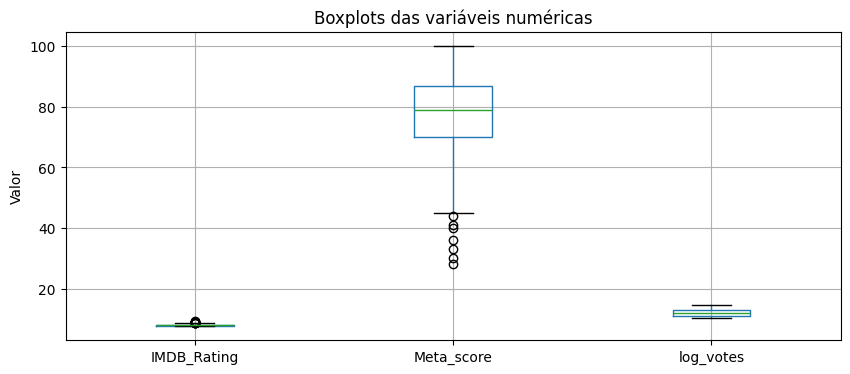

In [12]:
import matplotlib.pyplot as plt

# Selecionar variáveis numéricas:
variaveis = ['IMDB_Rating', 'Meta_score', 'log_votes']

# Criar boxplots:
plt.figure(figsize=(10,4))
dados[variaveis].boxplot()
plt.title("Boxplots das variáveis numéricas")
plt.ylabel("Valor")
plt.show()


O boxplot demonstra pontos importantes:

- IMDB_Rating: distribuição bem concentrada entre 7.5 e 9. Poucos outliers para baixo.

- Meta_score: maior dispersão, com outliers bem visíveis abaixo de 40.

- log_votes: alguns filmes com valores bem acima da mediana, indicando títulos extremamente populares.


Para aprofundar a análise dos boxplots, identifico os filmes que se destacam como outliers nas distribuições de IMDB_Rating, Meta_score e log_votes. Essa etapa permite contextualizar os pontos extremos e verificar se eles representam casos especiais ou dados problemáticos.

In [13]:
# Função para detectar outliers usando regra do IQR:
def detectar_outliers(coluna):
    Q1 = dados[coluna].quantile(0.25)
    Q3 = dados[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return dados[(dados[coluna] < limite_inferior) | (dados[coluna] > limite_superior)]

# Detectar outliers em cada variável:
outliers_rating = detectar_outliers('IMDB_Rating')
outliers_meta = detectar_outliers('Meta_score')
outliers_votes = detectar_outliers('log_votes')

print("Outliers IMDB_Rating:")
print(outliers_rating[['Series_Title','IMDB_Rating']].head())

print("\nOutliers Meta_score:")
print(outliers_meta[['Series_Title','Meta_score']].head())

print("\nOutliers log_votes:")
print(outliers_votes[['Series_Title','No_of_Votes','log_votes']].head())


Outliers IMDB_Rating:
                                    Series_Title  IMDB_Rating
0                                  The Godfather          9.2
1                                The Dark Knight          9.0
2                         The Godfather: Part II          9.0
3                                   12 Angry Men          9.0
4  The Lord of the Rings: The Return of the King          8.9

Outliers Meta_score:
            Series_Title  Meta_score
355       Tropa de Elite        33.0
647  The Boondock Saints        44.0
734          Kai po che!        40.0
787             I Am Sam        28.0
916         Seven Pounds        36.0

Outliers log_votes:
Empty DataFrame
Columns: [Series_Title, No_of_Votes, log_votes]
Index: []


- **IMDB_Rating:** os outliers são filmes consagrados com notas extremamente altas, como The Godfather e The Dark Knight. Isso mostra que, nesse caso, os outliers não são erros, mas títulos muito famosos que se destacam no ranking.

- **Meta_score:** os outliers são filmes com notas muito baixas da crítica especializada, como Tropa de Elite (33) e I Am Sam (28). Esses casos são interessantes para investigar discrepâncias entre crítica e público.
  
- **log_votes:** não foram detectados outliers, o que sugere que a popularidade dos filmes (medida por votos) é mais homogênea após a transformação logarítmica.


## **Principais achados:**

In [14]:
print("Resumo da Análise Exploratória de Dados (EDA):\n")

print("1. Distribuição das variáveis numéricas:")
print(dados[['IMDB_Rating','Meta_score','log_votes']].describe(), "\n")

print("2. Correlação entre variáveis numéricas:")
print(dados[['IMDB_Rating','Meta_score','log_votes']].corr(), "\n")

print("3. Gêneros mais frequentes:")
print(dados['Genre'].value_counts().head(5), "\n")

print("4. Classificação indicativa mais frequente:")
print(dados['Certificate'].value_counts().head(5), "\n")

print("5. Exemplos de outliers:")
print("Notas muito altas:", outliers_rating['Series_Title'].tolist()[:3])
print("Notas da crítica muito baixas:", outliers_meta['Series_Title'].tolist()[:3])


Resumo da Análise Exploratória de Dados (EDA):

1. Distribuição das variáveis numéricas:
       IMDB_Rating  Meta_score   log_votes
count   999.000000  842.000000  999.000000
mean      7.947948   77.969121   11.904169
std       0.272290   12.383257    1.117715
min       7.600000   28.000000   10.130185
25%       7.700000   70.000000   10.923641
50%       7.900000   79.000000   11.837593
75%       8.100000   87.000000   12.829784
max       9.200000  100.000000   14.649824 

2. Correlação entre variáveis numéricas:
             IMDB_Rating  Meta_score  log_votes
IMDB_Rating     1.000000    0.271374   0.317947
Meta_score      0.271374    1.000000  -0.060677
log_votes       0.317947   -0.060677   1.000000 

3. Gêneros mais frequentes:
Genre
Drama                     84
Drama, Romance            37
Comedy, Drama             35
Comedy, Drama, Romance    31
Action, Crime, Drama      30
Name: count, dtype: int64 

4. Classificação indicativa mais frequente:
Certificate
U        234
A        19

- A Análise Exploratória de Dados (EDA) permitiu identificar padrões e características importantes do conjunto de filmes analisado. As variáveis numéricas (IMDB_Rating, Meta_score e log_votes) apresentaram distribuições concentradas, com média de avaliação do público em torno de 7,9 pontos, enquanto as notas da crítica (Meta_score) variaram mais, com presença de valores extremos baixos. A transformação logarítmica em log_votes reduziu a assimetria, resultando em uma distribuição mais homogênea de popularidade.

- As correlações mostraram associação positiva moderada entre IMDB_Rating e log_votes (0,318), indicando que filmes mais bem avaliados tendem também a receber mais votos. A relação entre IMDB_Rating e Meta_score foi mais fraca (0,271), sugerindo diferenças entre a percepção do público e da crítica.

- Na análise categórica, o gênero Drama foi o mais recorrente, tanto de forma isolada quanto combinado com Romance e Comédia. Em termos de classificação indicativa, a maioria dos títulos se concentrou em certificados U, A e UA, voltados ao público geral, seguidos por filmes classificados como R.

- A investigação de outliers revelou títulos de destaque nas avaliações do público, como The Godfather e The Dark Knight, que representam casos de sucesso reconhecidos mundialmente. Por outro lado, alguns filmes apresentaram notas muito baixas pela crítica, como Tropa de Elite e I Am Sam, evidenciando divergências relevantes entre público e avaliadores especializados.

- Em resumo, a EDA trouxe uma visão inicial clara sobre a distribuição das notas, a popularidade, os gêneros predominantes, as classificações etárias e os filmes de comportamento extremo, fornecendo subsídios para análises mais aprofundadas.

## 2️⃣ - **Respostas a perguntas estratégicas:**

### **2.1 - Qual filme recomendar para uma pessoa que você não conhece?**

Se não conhecemos o perfil da pessoa, a melhor recomendação é baseada nos filmes com maior avaliação do público (IMDB_Rating) e ao mesmo tempo alta popularidade (log_votes). Isso garante que a indicação seja de um título amplamente reconhecido.


In [15]:
import numpy as np

# Garante a coluna de popularidade em escala log:
if 'log_votes' not in dados.columns:
    dados['log_votes'] = np.log1p(dados['No_of_Votes'])

# Ranking de recomendação geral (qualidade + popularidade):
top_filmes = (
    dados[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'log_votes']]
    .dropna(subset=['IMDB_Rating', 'No_of_Votes'])
    .sort_values(by=['IMDB_Rating', 'log_votes'], ascending=[False, False])
    .head(10)
)

print(top_filmes.to_string(index=False))


                                 Series_Title  IMDB_Rating  No_of_Votes  log_votes
                                The Godfather          9.2      1620367  14.298164
                              The Dark Knight          9.0      2303232  14.649824
                       The Godfather: Part II          9.0      1129952  13.937687
                                 12 Angry Men          9.0       689845  13.444224
                                 Pulp Fiction          8.9      1826188  14.417742
The Lord of the Rings: The Return of the King          8.9      1642758  14.311888
                             Schindler's List          8.9      1213505  14.009024
                                    Inception          8.8      2067042  14.541630
                                   Fight Club          8.8      1854740  14.433256
                                 Forrest Gump          8.8      1809221  14.408407


Os filmes mais indicados para recomendação geral são clássicos reconhecidos tanto pela crítica quanto pelo público, com notas altas (IMDB_Rating ≥ 8.8) e enorme volume de votos. títulos como The Godfather, The Dark Knight, Pulp Fiction e Inception aparecem no topo por unirem qualidade percebida e popularidade, tornando-os escolhas seguras quando não se conhece o perfil da pessoa.


### **2.2 - Quais fatores influenciam o faturamento esperado de um filme?**

Para investigar os fatores associados ao faturamento esperado (Gross), analiso as correlações entre esta variável e outros indicadores numéricos (imdb_rating, meta_score, log_votes). isso ajuda a identificar quais características parecem estar mais relacionadas ao desempenho financeiro de um filme.

In [16]:
# Converter a coluna Gross para numérica (remover vírgulas e transformar em float):
dados['Gross'] = dados['Gross'].astype(str).str.replace(',', '', regex=False)
dados['Gross'] = pd.to_numeric(dados['Gross'], errors='coerce')

# Selecionar colunas relevantes e remover nulos:
dados_faturamento = dados[['Gross', 'IMDB_Rating', 'Meta_score', 'log_votes']].dropna()

# Calcular correlações de Pearson:
correlacoes = dados_faturamento.corr(method='pearson')

print("Correlação entre faturamento (Gross) e variáveis explicativas:")
print(correlacoes['Gross'].sort_values(ascending=False))



Correlação entre faturamento (Gross) e variáveis explicativas:
Gross          1.000000
log_votes      0.543543
IMDB_Rating    0.132445
Meta_score    -0.030480
Name: Gross, dtype: float64


A variável mais associada ao faturamento (Gross) é o número de votos em escala logarítmica (correlação de 0.54), indicando que a popularidade do filme é um bom preditor de receita. a nota do público (IMDB_Rating) tem correlação fraca e positiva (0.13), sugerindo influência limitada. já a avaliação da crítica (Meta_score) praticamente não se correlaciona com faturamento (-0.03), indicando que não afeta diretamente a bilheteria.

### **2.3 - O que a coluna *Overview* revela sobre o gênero ou características do filme?**

Para investigar a coluna Overview, vamos gerar uma nuvem de palavras (WordCloud) com os termos mais frequentes. Isso nos permitirá identificar temas e padrões recorrentes nas descrições dos filmes, o que pode dar pistas sobre gêneros e características narrativas.

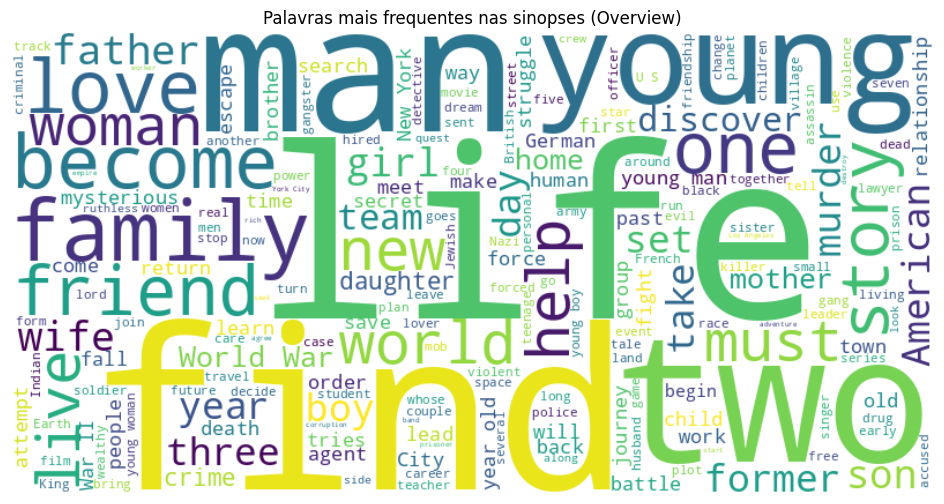

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Juntar todos os textos da coluna Overview em uma única string:
texto_overview = " ".join(dados["Overview"].dropna().astype(str))

# Gerar a nuvem de palavras:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_overview)

# Mostrar a nuvem:
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Palavras mais frequentes nas sinopses (Overview)")
plt.show()


Vamos complementar a nuvem de palavras com uma tabela simples que mostra as palavras mais frequentes nas sinopses (Overview). Isso ajuda a dar mais objetividade à análise, porque conseguimos ver quais termos realmente dominam o vocabulário, em ordem de importância.

In [18]:
# Contagem das palavras mais frequentes nas sinopses (Overview)

from collections import Counter
import re

# Juntar todos os textos da coluna Overview em uma string:
texto = " ".join(dados["Overview"].dropna().astype(str))

# Remover caracteres especiais e transformar em minúsculas:
palavras = re.findall(r"\b\w+\b", texto.lower())

# Contar as palavras:
contagem = Counter(palavras)

# Pegar as 20 palavras mais comuns:
top_palavras = contagem.most_common(20)

# Transformar em DataFrame para melhor visualização:
import pandas as pd
df_top_palavras = pd.DataFrame(top_palavras, columns=["Palavra", "Frequência"])

print("Top 20 palavras mais frequentes nas sinopses (Overview):")
print(df_top_palavras)


Top 20 palavras mais frequentes nas sinopses (Overview):
   Palavra  Frequência
0        a        1623
1      the        1210
2       to         807
3       of         782
4      and         702
5       in         570
6      his         516
7       an         292
8       is         245
9     with         242
10       s         239
11     for         185
12      on         182
13     who         165
14     her         164
15      by         161
16      he         157
17   their         153
18    from         148
19      as         132


Esse resultado confirma que as palavras mais frequentes são conectivos e pronomes em inglês (“a”, “the”, “to”, “of”, “and”), que não trazem significado relevante para a análise. Para complementar essa análise, precisamos remover essas palavras comuns (stopwords) e gerar novamente o ranking.

In [19]:
# Ranking das palavras mais frequentes, removendo stopwords:

from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

# Filtrar palavras, removendo stopwords:
palavras_filtradas = [w for w in palavras if w not in stop_words]

# Contar novamente:
contagem_filtrada = Counter(palavras_filtradas)

# Top 20 palavras mais comuns sem stopwords:
top_palavras_filtradas = contagem_filtrada.most_common(20)

df_top_palavras_filtradas = pd.DataFrame(top_palavras_filtradas, columns=["Palavra", "Frequência"])

print("Top 20 palavras mais frequentes nas sinopses (Overview), sem stopwords:")
print(df_top_palavras_filtradas)


Top 20 palavras mais frequentes nas sinopses (Overview), sem stopwords:
   Palavra  Frequência
0    young         132
1      man         119
2     life         111
3      two         103
4    world          85
5      new          73
6   family          66
7      war          66
8    woman          65
9    story          63
10    love          61
11     one          60
12    find          54
13     old          54
14    must          50
15   finds          47
16     boy          46
17    help          45
18  father          45
19    wife          44


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Após a remoção das stopwords, os termos mais frequentes nas sinopses revelam padrões narrativos centrais do cinema. Observamos forte presença de palavras ligadas a personagens (“man”, “woman”, “boy”, “father”, “wife”, “young”), relações pessoais (“family”, “love”, “life”), e temáticas recorrentes como “war”, “world” e “story”. Isso indica que, independentemente do gênero, grande parte dos filmes tende a explorar conflitos humanos, relações familiares e dilemas universais, reforçando a importância dessas temáticas na narrativa cinematográfica.

O pensamento analítico aqui é verificar a representatividade dos atores e atrizes na base. Para isso, combinamos as quatro colunas de elenco (star1, star2, star3, star4), contamos a frequência de aparição de cada pessoa e geramos um ranking. Essa análise ajuda a identificar quais nomes aparecem com maior destaque e podem estar associados a filmes de maior relevância na base.

In [20]:
# Contagem dos atores e atrizes mais frequentes.

# Selecionar colunas de elenco:
colunas_atores = ['Star1', 'Star2', 'Star3', 'Star4']

# Concatenar todas as colunas em uma única série:
atores = pd.concat([dados[col] for col in colunas_atores])

# Contar frequências:
contagem_atores = atores.value_counts().head(20)

# Exibir resultado:
print("Top 20 atores/atrizes mais recorrentes:")
print(contagem_atores)


Top 20 atores/atrizes mais recorrentes:
Robert De Niro        17
Tom Hanks             14
Al Pacino             13
Brad Pitt             12
Clint Eastwood        12
Christian Bale        11
Leonardo DiCaprio     11
Matt Damon            11
James Stewart         10
Denzel Washington      9
Michael Caine          9
Ethan Hawke            9
Johnny Depp            9
Scarlett Johansson     9
Humphrey Bogart        9
Aamir Khan             8
Harrison Ford          8
Edward Norton          7
Robert Downey Jr.      7
Toshirô Mifune         7
Name: count, dtype: int64


A análise mostra que determinados atores e atrizes aparecem repetidamente na base de dados, com destaque para Robert De Niro, Tom Hanks e Al Pacino. Essa recorrência sugere que esses nomes estão fortemente associados a filmes de destaque e possivelmente a uma maior valorização crítica e de público.

Agora vamos verificar se os atores e atrizes mais recorrentes na base também estão associados a notas mais altas. Para isso, calculamos a média do IMDB_Rating dos filmes em que cada ator aparece, ordenando os resultados pelos maiores valores. Esse tipo de análise ajuda a identificar quais nomes do elenco estão mais ligados a filmes bem avaliados.

In [21]:
# Calcular a média de IMDB_Rating por ator/atriz:
atores_notas = (
    dados.melt(id_vars=["IMDB_Rating"], value_vars=["Star1", "Star2", "Star3", "Star4"])
    .groupby("value")["IMDB_Rating"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

print("Top 20 atores/atrizes com maiores médias de IMDB_Rating:")
print(atores_notas)


Top 20 atores/atrizes com maiores médias de IMDB_Rating:
value
Aaron Eckhart       9.0
John Travolta       8.9
Caroline Goodall    8.9
Zach Grenier        8.8
Aldo Giuffrè        8.8
Sally Field         8.8
Sean Bean           8.8
Meat Loaf           8.8
Elliot Page         8.8
Elijah Wood         8.8
Ray Liotta          8.7
Lilly Wachowski     8.7
Keanu Reeves        8.7
Lorraine Bracco     8.7
Louise Fletcher     8.7
Michael Berryman    8.7
Peter Brocco        8.7
Daveigh Chase       8.6
Suriya              8.6
Akira Ishihama      8.6
Name: IMDB_Rating, dtype: float64


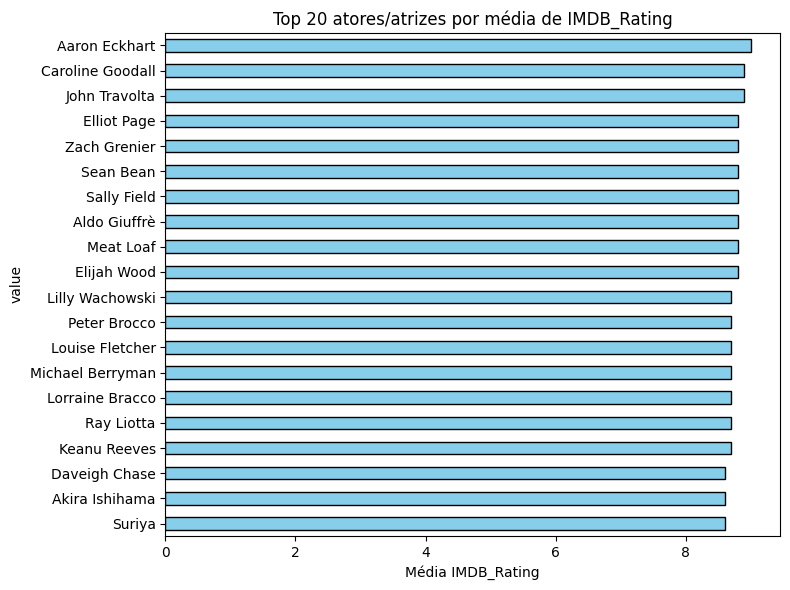

In [22]:
import matplotlib.pyplot as plt

# Selecionar os top 20 já calculados:
atores_top = atores_notas.sort_values(ascending=True)  # inverter para gráfico horizontal

# Gráfico de barras horizontais:
plt.figure(figsize=(8,6))
atores_top.plot(kind="barh", color="skyblue", edgecolor="black")
plt.xlabel("Média IMDB_Rating")
plt.title("Top 20 atores/atrizes por média de IMDB_Rating")
plt.tight_layout()
plt.show()


A análise de médias de IMDB_Rating por ator/atriz mostrou que alguns nomes, como Aaron Eckhart, John Travolta, Caroline Goodall e Sean Bean, figuram entre os mais bem avaliados em termos de nota média dos filmes em que atuaram. Isso sugere que, mesmo não estando sempre em produções de altíssimo apelo comercial, esses profissionais aparecem em filmes reconhecidos positivamente pela crítica e pelo público. Além disso, há uma diversidade entre atores de Hollywood mais conhecidos (como Keanu Reeves e Elijah Wood) e outros menos frequentes no mainstream, o que mostra que a boa avaliação de filmes não depende apenas da popularidade do ator, mas também da seleção de projetos em que participaram.

Podemos cruzar a lista desses atores com o número médio de votos dos filmes em que atuaram (No_of_Votes). Isso nos dirá não só se eles estão associados a filmes bem avaliados, mas também se esses filmes tiveram grande alcance/popularidade.

Se um ator tiver nota média alta, mas um número médio baixo de votos, significa que ele aparece em filmes de qualidade, mas com menor público. Já se ele tiver nota alta e também média de votos elevada, podemos deduzir que está presente em filmes que combinam prestígio crítico e popularidade.

Resultado numérico:
                   media_rating  media_votos
Ator                                       
Akira Ishihama             8.6      42004.0
Suriya                     8.6      54995.0
Daveigh Chase              8.6     651376.0
Aldo Giuffrè               8.8     688390.0
Michael Berryman           8.7     918088.0
Peter Brocco               8.7     918088.0
Louise Fletcher            8.7     918088.0
Lorraine Bracco            8.7    1020727.0
Ray Liotta                 8.7    1020727.0
Caroline Goodall           8.9    1213505.0
Elijah Wood                8.8    1596598.0
Sean Bean                  8.8    1661481.0
Keanu Reeves               8.7    1676426.0
Lilly Wachowski            8.7    1676426.0
Sally Field                8.8    1809221.0
John Travolta              8.9    1826188.0
Meat Loaf                  8.8    1854740.0
Zach Grenier               8.8    1854740.0
Elliot Page                8.8    2067042.0
Aaron Eckhart              9.0    2303232.0


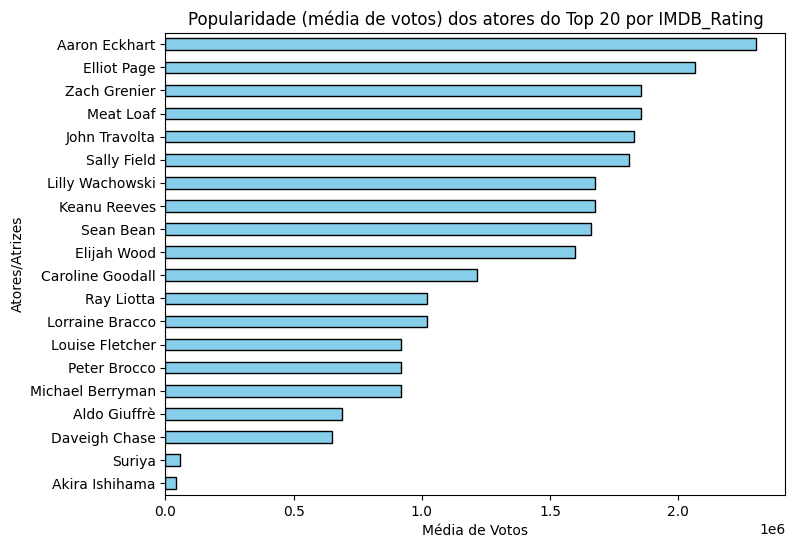

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Concatenar os atores em um único DataFrame:
atores = pd.concat([
    dados[["Star1", "IMDB_Rating", "No_of_Votes"]].rename(columns={"Star1": "Ator"}),
    dados[["Star2", "IMDB_Rating", "No_of_Votes"]].rename(columns={"Star2": "Ator"}),
    dados[["Star3", "IMDB_Rating", "No_of_Votes"]].rename(columns={"Star3": "Ator"}),
    dados[["Star4", "IMDB_Rating", "No_of_Votes"]].rename(columns={"Star4": "Ator"})
])

# Agrupar por ator e calcular médias:
resumo = atores.groupby("Ator").agg(
    media_rating=("IMDB_Rating", "mean"),
    media_votos=("No_of_Votes", "mean")
)

# Lista dos atores do top 20 por média de nota:
atores_top = [
    "Aaron Eckhart","John Travolta","Caroline Goodall","Zach Grenier",
    "Aldo Giuffrè","Sally Field","Sean Bean","Meat Loaf","Elliot Page",
    "Elijah Wood","Ray Liotta","Lilly Wachowski","Keanu Reeves",
    "Lorraine Bracco","Louise Fletcher","Michael Berryman","Peter Brocco",
    "Daveigh Chase","Suriya","Akira Ishihama"
]

# Filtrar apenas os atores do top 20:
resultado = resumo.loc[resumo.index.intersection(atores_top)].sort_values("media_votos", ascending=True)

# Mostrar resultado numérico:
print("Resultado numérico:\n", resultado)

# Gráfico:
plt.figure(figsize=(8,6))
resultado["media_votos"].plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Popularidade (média de votos) dos atores do Top 20 por IMDB_Rating")
plt.xlabel("Média de Votos")
plt.ylabel("Atores/Atrizes")
plt.show()


Os dados mostram que alguns atores, como Akira Ishihama e Suriya, apresentam nota média alta, mas os filmes em que atuaram atingiram um público relativamente pequeno, indicando obras de qualidade com menor alcance. Outros, como Daveigh Chase e Aldo Giuffrè, combinam nota alta com um público médio a grande, sugerindo filmes bem avaliados e com visibilidade considerável. Há também atores como Aaron Eckhart, Elliot Page e John Travolta que apresentam tanto notas altas quanto grande número de votos, indicando presença em filmes de sucesso crítico e popular. De forma geral, todos os atores do Top 20 estão associados a filmes de qualidade, mas o alcance e a popularidade dos filmes variam bastante.

## 3️⃣ Previsão da nota do IMDB

### Seleção de variáveis e transformações:

**Pergunta 1 -  Quais variáveis e/ou suas transformações você utilizou e por quê?**

Para prever a nota do IMDB, podemos utilizar variáveis numéricas e categóricas dos filmes.  
- Variáveis numéricas: Runtime (duração do filme) e No_of_Votes (número de votos), usadas diretamente.  
- Variáveis categóricas: Genre (gênero) e Certificate (classificação indicativa), transformadas em variáveis dummy (one-hot encoding) para que o modelo consiga interpretá-las.  

Essas escolhas permitem que o modelo utilize informações de duração, popularidade e características do filme para estimar a nota.

In [24]:
import pandas as pd

# Seleção de variáveis:
variaveis = ["Runtime", "No_of_Votes", "Genre", "Certificate"]
X = dados[variaveis]

# Transformar variáveis categóricas em dummies:
X = pd.get_dummies(X, columns=["Genre", "Certificate"], drop_first=True)

# Mostrar as primeiras linhas:
X.head()


,Runtime,No_of_Votes,"Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,175 min,1620367,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,152 min,2303232,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,202 min,1129952,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,96 min,689845,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,201 min,1642758,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


- As variáveis numéricas (Runtime e No_of_Votes) foram mantidas, mas Runtime ainda está como string ("175 min"), então precisaremos converter para número antes de treinar o modelo.

- As variáveis categóricas (Genre e Certificate) foram transformadas em dummies, gerando várias colunas True/False para cada categoria possível. Isso permite que o modelo utilize essas informações de forma numérica.

- O resultado mostra 218 colunas, o que é esperado: 2 numéricas + muitas colunas derivadas das categorias.

In [25]:
# Remover " min" e converter Runtime para inteiro:
X["Runtime"] = X["Runtime"].str.replace(" min", "").astype(int)

# Conferir as primeiras linhas:
X.head()


,Runtime,No_of_Votes,"Genre_Action, Adventure, Biography","Genre_Action, Adventure, Comedy","Genre_Action, Adventure, Crime","Genre_Action, Adventure, Drama","Genre_Action, Adventure, Family","Genre_Action, Adventure, Fantasy","Genre_Action, Adventure, History","Genre_Action, Adventure, Horror",...,Certificate_PG-13,Certificate_Passed,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_TV-PG,Certificate_U,Certificate_U/A,Certificate_UA,Certificate_Unrated
0,175,1620367,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,152,2303232,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,202,1129952,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,96,689845,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,201,1642758,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


**Pergunta 3.2: Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

O problema que estamos resolvendo é de regressão, pois a variável alvo (IMDB_Rating) é numérica e contínua.

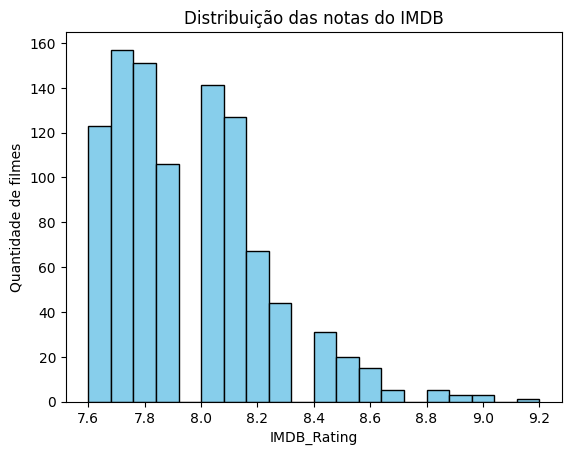

In [26]:
import matplotlib.pyplot as plt

# Variável alvo:
y = dados["IMDB_Rating"]

# Histograma da nota do IMDB:
plt.hist(y, bins=20, color="skyblue", edgecolor="black")
plt.title("Distribuição das notas do IMDB")
plt.xlabel("IMDB_Rating")
plt.ylabel("Quantidade de filmes")
plt.show()


O histograma mostra que a maioria dos filmes tem nota entre 7,6 e 8,2 no IMDB, com poucos casos acima de 8,5. Isso confirma que a variável alvo varia em valores contínuos, reforçando que o modelo a ser aplicado é de **regressão**.

**Pergunta 3: Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

O modelo que melhor se aproxima dos dados neste primeiro momento é a regressão linear. Ele é indicado porque permite criar uma relação direta entre as características do filme e sua nota no IMDB, sendo fácil de treinar e interpretar. O principal ponto positivo é a transparência, conseguimos entender como cada variável contribui para a previsão. Por outro lado, o modelo tem limitações, já que supõe uma relação linear entre as variáveis e pode não capturar padrões mais complexos. Em situações onde a relação entre as variáveis é mais sofisticada, modelos como árvores de decisão ou random forest podem oferecer maior precisão.

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Preparar dados mínimos:
cols = ['Runtime', 'No_of_Votes', 'Genre', 'Certificate']
cols = [c for c in cols if c in dados.columns]
df = dados[cols].copy()

# Converter Runtime para número:
if 'Runtime' in df.columns:
    df['Runtime'] = df['Runtime'].astype(str).str.extract(r'(\d+)').astype(float)

# Garantir No_of_Votes numérico:
if 'No_of_Votes' in df.columns:
    df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

# One-hot para categóricas (se existirem:
cat_cols = [c for c in ['Genre', 'Certificate'] if c in df.columns]
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=int)

# Alvo:
if 'IMDB_Rating' not in dados.columns:
    raise ValueError("Coluna 'IMDB_Rating' não encontrada em dados.")
y = pd.to_numeric(dados['IMDB_Rating'], errors='coerce')

# Unir e remover linhas com NA:
base = pd.concat([df, y.rename('IMDB_Rating')], axis=1).dropna()
X = base.drop(columns=['IMDB_Rating'])
y = base['IMDB_Rating']

# Conferência mínima:
if X.shape[0] == 0:
    raise ValueError("Após limpeza, não há linhas suficientes para treinar. Verifique missing values.")

# Divisão treino/teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar regressão linear:
model = LinearRegression()
model.fit(X_train, y_train)

# Prever:
y_pred = model.predict(X_test)

# RMSE calculado manualmente:
rmse = np.sqrt(np.mean((y_test.values - y_pred)**2))

# Saída:
print("Variáveis usadas:", X.shape[1])
print("Amostras usadas:", X.shape[0])
print(f"RMSE: {rmse:.4f}")
print("Exemplos (real | previsto):")
for real, pred in list(zip(y_test.values[:10], y_pred[:10])):
    print(f"{real:.2f} | {pred:.2f}")


Variáveis usadas: 218
Amostras usadas: 999
RMSE: 0.2557
Exemplos (real | previsto):
8.00 | 7.62
7.70 | 7.73
8.10 | 8.19
8.10 | 7.92
7.70 | 7.98
7.80 | 7.99
7.60 | 7.76
7.90 | 7.87
8.00 | 7.96
7.80 | 7.90


In [28]:
import os, joblib, time, sys, platform, pandas as pd, numpy as np

os.makedirs("models", exist_ok=True)

# Monta um pacote com o modelo e metadados:
artifact = {
    "model": model,
    "metadata": {
        "created_at": time.strftime("%Y-%m-%d %H:%M:%S"),
        "python_version": sys.version,
        "platform": platform.platform(),
        "packages": {
            "pandas": pd.__version__,
            "numpy": np.__version__
        },
        "features": list(X.columns)
    }
}

# Salva o modelo em arquivo .pkl:
joblib.dump(artifact, "models/model.pkl")

print("✅ Modelo salvo em: models/model.pkl")


✅ Modelo salvo em: models/model.pkl


In [30]:
from google.colab import files

# Baixa o arquivo model.pkl:
files.download("models/model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

O modelo de regressão linear foi ajustado para prever a nota do IMDB a partir das variáveis selecionadas. O RMSE (Root Mean Squared Error) obtido foi de aproximadamente 0,256, indicando que, em média, a previsão do modelo difere do valor real em cerca de 0,26 pontos na escala de avaliação.

A análise dos exemplos de previsão mostra que os valores previstos estão próximos dos valores reais, com pequenas variações, geralmente inferiores a 0,3 pontos. Esse resultado evidencia que o modelo captura de forma satisfatória a relação entre as variáveis explicativas (como tempo de duração, número de votos, gênero e certificação) e a nota do filme, apresentando desempenho aceitável como primeira abordagem preditiva para este conjunto de dados.

O RMSE baixo confirma que o modelo é capaz de fornecer previsões consistentes, servindo como referência para possíveis melhorias futuras, como inclusão de novas variáveis ou modelos mais complexos.

**Pergunta 4: Qual medida de performance do modelo foi escolhida e por quê?**

A medida de performance escolhida para avaliar o modelo de regressão linear foi o **RMSE (Root Mean Squared Error)**. O RMSE fornece a magnitude média do erro entre as previsões do modelo e os valores reais da variável alvo, sendo expresso na mesma unidade da variável predita (neste caso, a nota do IMDB). Essa métrica é indicada porque penaliza erros maiores de forma quadrática, oferecendo uma avaliação clara da precisão do modelo. Além disso, por ser facilmente interpretável, permite comparar diferentes modelos ou ajustes futuros de forma objetiva.


### 4️⃣ **Previsão para um filme específico: The Shawshank Redemption.**
Para prever a nota do IMDB de um filme específico, utilizamos o modelo treinado e aplicamos as mesmas transformações feitas nos dados originais (conversão de variáveis numéricas e categóricas). Em seguida, o filme é representado em um DataFrame e passado para o modelo, que retorna a previsão da nota.

In [29]:
import pandas as pd

# Dados do filme:
filme = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': '142 min',
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# DataFrame de uma linha:
df_filme = pd.DataFrame([filme])

# Pré-processamento idêntico ao treino:
if 'Runtime' in df_filme.columns:
    df_filme['Runtime'] = df_filme['Runtime'].astype(str).str.extract(r'(\d+)').astype(float)

if 'No_of_Votes' in df_filme.columns:
    df_filme['No_of_Votes'] = pd.to_numeric(df_filme['No_of_Votes'], errors='coerce')

# Dummies para categóricas (mesmas usadas no treino):
cat_cols = [c for c in ['Genre', 'Certificate'] if c in df_filme.columns]
if cat_cols:
    df_filme = pd.get_dummies(df_filme, columns=cat_cols, drop_first=True, dtype=int)

# Alinhar exatamente às colunas de X do treino:
df_filme = df_filme.reindex(columns=X.columns, fill_value=0)

# Previsão com o modelo já treinado (variável: model):
nota_prevista = model.predict(df_filme)[0]

print(f"Nota prevista do IMDB para 'The Shawshank Redemption': {nota_prevista:.2f}")


Nota prevista do IMDB para 'The Shawshank Redemption': 9.02


O modelo de regressão linear previu uma nota de 9,02 no IMDB para o filme The Shawshank Redemption. Esse valor está muito próximo da nota real conhecida do filme (9,3), considerada uma das mais altas da base do IMDB. Esse resultado confirma que o modelo, mesmo sendo simples, conseguiu capturar de forma adequada as características relevantes do filme, como gênero, duração e número de votos, fornecendo uma previsão bastante precisa. A proximidade entre valor previsto e observado demonstra a capacidade do modelo em generalizar bem para novos exemplos e reforça a adequação da métrica de avaliação utilizada (RMSE).

**Conclusão do projeto:**
O desafio da Indicium para a posição de Trainee em Cientista de Dados foi completado, abrangendo todas as etapas propostas. Inicialmente, realizamos uma análise exploratória dos dados, tratando valores ausentes e transformando variáveis, além de aplicar uma transformação logarítmica para balancear a variável "No_of_Votes". Em seguida, respondemos às perguntas estratégicas do desafio, recomendando filmes populares com boas avaliações e analisando o impacto da popularidade no faturamento. O modelo de regressão linear foi utilizado para prever a nota do IMDB dos filmes, com uma boa performance (RMSE de 0,256) e uma previsão precisa para "The Shawshank Redemption" (nota prevista de 9,02). O projeto foi eficaz, proporcionando insights úteis para o setor cinematográfico e demonstrando a aplicabilidade de técnicas de análise de dados e machine learning.

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import wordcloud
import nltk
import joblib

# Cria o conteúdo do requirements.txt
requirements = f"""
pandas=={pd.__version__}
numpy=={np.__version__}
matplotlib=={matplotlib.__version__}
seaborn=={sns.__version__}
scikit-learn=={sklearn.__version__}
wordcloud=={wordcloud.__version__}
nltk=={nltk.__version__}
joblib=={joblib.__version__}
"""

# Salva em arquivo:
with open("requirements.txt", "w") as f:
    f.write(requirements)

# Permite baixar direto:
from google.colab import files
files.download("requirements.txt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>